**The Purpose of this implmentation, is to try to find the best regressor with the highest R-squared error value**

**First** : 

define function for applying the regular Linear regression

Parameters:

1. X-training values
2. X-testing values
3. y-training values    
4. y-testing values

Returns:

1. The prediciton 
2. R-squared error value

In [6]:
def regularLinear(X_train_raw, X_test_raw, y_train_raw, y_test_raw):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    
    lr = LinearRegression()
    lr.fit(X_train_raw,y_train_raw)

    y_pred = lr.predict(X_test_raw)

    Er_lr = r2_score(y_test_raw,y_pred)
    print('Linear Error: ', Er_lr)

    return y_pred, Er_lr

**Second** : 

define function for applying the Polynomial Linear regression that returns

Parameters:

1. X-training values
2. X-testing values
3. y-training values    
4. y-testing values

Returns:

1. X_Training as PolynomialFeatures (To be used in ridge and lasso)
2. X_Testing as PolynomialFeatures (To be used in ridge and lasso)
3. The prediciton 
4. R-squared error value

In [7]:
def polyDegree(X_train_raw, X_test_raw, y_train_raw, y_test_raw):    
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    from sklearn.linear_model import LinearRegression

    bestError = None
    bestDegree = None
    X_train_poly_final = None
    X_test_poly_final = None
    y_pred_poly_final = None

    for dg in range(1,21):
        poly = PolynomialFeatures(degree = dg)
        X_train_poly = poly.fit_transform(X_train_raw)
        X_test_poly =  poly.fit_transform(X_test_raw)

        lr_poly = LinearRegression()
        lr_poly.fit(X_train_poly, y_train_raw)

        y_pred_poly = lr_poly.predict(X_test_poly)

        er_poly = r2_score(y_test_raw,y_pred_poly)

        if bestError is None or bestError < er_poly:
            bestError = er_poly
            bestDegree = dg
            X_train_poly_final = X_train_poly
            X_test_poly_final = X_test_poly
            y_pred_poly_final = y_pred_poly

    print('Poly Error: ', bestError, ' -- Degree: ', bestDegree)
    return X_train_poly_final, X_test_poly_final, y_pred_poly_final, bestError

**Third** : 

define function for applying the Regularization regressions [Ridge and Lasso] that returns

Parameters:

1. X_Training as PolynomialFeatures
2. X_Testing as PolynomialFeatures
3. y-training values    
4. y-testing values
5. Method [Ridge or Lasso]

Returns:

1. The prediciton 
2. R-squared error value

In [8]:
def alphaRegulariz(x_poly_train_raw, x_poly_test_raw, y_train_raw, y_test_raw, method):
    bestError = None
    bestAlpha = None
    alphaValues = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
    bestPred = None
    
    from sklearn.metrics import r2_score
    
    if method == 'Ridge':
        from sklearn.linear_model import Ridge

        for alphaVal in alphaValues:
            ridge = Ridge(alpha = alphaVal, normalize=True)
            ridge.fit(x_poly_train_raw, y_train_raw)
            y_pred = ridge.predict(x_poly_test_raw)

            errorValue = r2_score(y_test_raw,y_pred)

            if  bestError is None or bestError < errorValue:
                bestError = errorValue
                bestAlpha = alphaVal
                bestPred = y_pred
    elif method == 'Lasso':
        from sklearn.linear_model import Lasso

        for alphaVal in alphaValues:
            lasso = Lasso(alpha = alphaVal, normalize=True)
            lasso.fit(x_poly_train_raw, y_train_raw)
            y_pred = lasso.predict(x_poly_test_raw)

            errorValue = r2_score(y_test_raw,y_pred)

            if bestError is None or bestError < errorValue:
                bestError = errorValue
                bestAlpha = alphaVal
                bestPred = y_pred
    print(method, ' Error: ', bestError, ' -- Best Alpha: ', bestAlpha)         
    return bestPred, bestError

**Fourth** : 

define the main function for applying all regressions and choose the highest error value, also it will draw the regressors prediction graphs

Parameters:

1. X Values
2. y Values

In [11]:
def bestRegressor(X, y):

    # 1- Select train and test samples
    from  sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 , shuffle= True)

    # 1.2- Scaling -- if required
    '''
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    '''
    
    # 2- Linear Regression
    linear_pred, linear_error  = regularLinear( X_train, X_test, y_train, y_test)

    # 3- Find the Poly features for the best Degree and the poly regressor prediction
    X_poly_train, x_poly_test, poly_pred, poly_error = polyDegree(X_train, X_test, y_train, y_test)

    # 4- Find Ridge & Lasso
    ridge_pred, ridge_error = alphaRegulariz(X_poly_train, x_poly_test, y_train, y_test, 'Ridge')
    lasso_pred, lasso_error = alphaRegulariz(X_poly_train, x_poly_test, y_train, y_test, 'Lasso')

    # 5- Print best r2 error
    r2_errors = {linear_error:"linear",poly_error:"poly",ridge_error:"ridge",lasso_error:"lasso"}

    print('Best regression: ', r2_errors.get(max(r2_errors)), ' -- with error r2: ', max(r2_errors))

    # 6- Draw Graphs
    import matplotlib.pyplot as plt

    # Linear 
    plt.plot(y_test ,'.', linear_pred,'-o')
    plt.title('Salary Data (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()

    # Poly Linear 
    plt.plot(y_test ,'.', poly_pred,'-o')
    plt.title('Salary Data (Poly Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()

    # Ridge 
    plt.plot(y_test ,'.', ridge_pred,'-o')
    plt.title('Salary Data (Ridge Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()

    # Lasso 
    plt.plot(y_test ,'.', lasso_pred,'-o')
    plt.title('Salary Data (Lasso Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()

**Finally** : 

Test the function, by loading data eg. (Salary_Data.csv)

Parameters:

1. X Values
2. y Values

Linear Error:  0.8800494635027144
Poly Error:  0.9451424158593563  -- Degree:  11
Ridge  Error:  0.9346495661667534  -- Best Alpha:  1e-15
Lasso  Error:  0.8881158493489556  -- Best Alpha:  1e-15
Best regression:  poly  -- with error r2:  0.9451424158593563


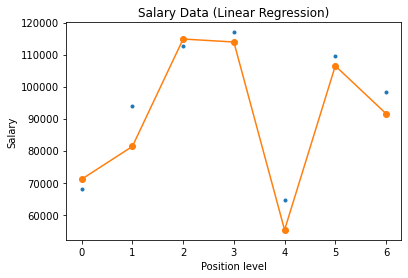

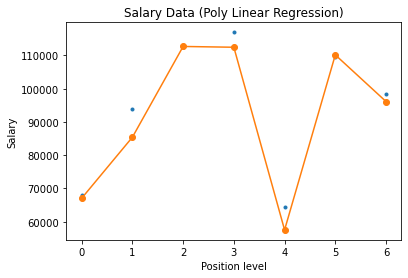

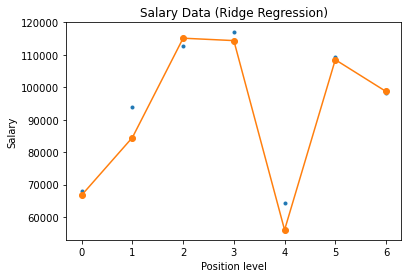

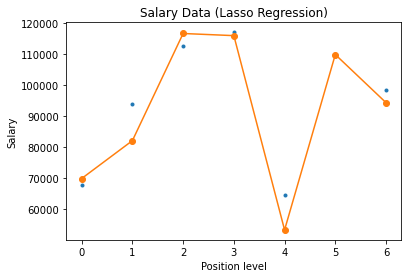

In [12]:
import numpy as np
import pandas as pd

import os 
os.chdir('F:\GIT\AI-Course-Python\AI-Python\PythonEnv1\ML\data')

df= pd.read_csv('Salary_Data.csv')
X= df.iloc[:,0].values
y= df.iloc[:,1].values  
X= X.reshape(-1,1)   # RESHAPED
y= y.reshape(-1,1)

bestRegressor(X, y)